In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/synthetic_dataset.csv')

1-explore data

In [3]:
data.head()

,Category,Price,Rating,Stock,Discount
0,NaN,5548.0,1.870322,NaN,0.0
1,NaN,3045.0,4.757798,NaN,38.0
2,NaN,4004.0,NaN,In Stock,0.0
3,NaN,4808.0,1.492085,NaN,33.0
4,NaN,1817.0,NaN,Out of Stock,23.0


In [4]:
new_data=pd.DataFrame(data)

In [5]:
new_data.shape

(4362, 5)

In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1614 non-null   object 
 1   Price     4188 non-null   float64
 2   Rating    2312 non-null   float64
 3   Stock     3010 non-null   object 
 4   Discount  3970 non-null   float64
dtypes: float64(3), object(2)
memory usage: 170.5+ KB


In [7]:
new_data.duplicated().sum()

np.int64(15)

In [8]:
new_data.isnull().sum()

,0
Category,2748
Price,174
Rating,2050
Stock,1352
Discount,392


In [9]:
new_data.nunique()

,0
Category,4
Price,3422
Rating,2312
Stock,2
Discount,50


In [10]:
new_data.describe()

,Price,Rating,Discount
count,4188.000000,2312.000000,3970.000000
mean,5016.970630,3.038293,24.516625
std,2839.984813,1.143074,14.347164
min,102.000000,1.000366,0.000000
25%,2628.250000,2.069490,12.000000
50%,4996.500000,3.082060,25.000000
75%,7418.000000,4.008620,37.000000
max,9999.000000,4.997818,49.000000


2-clean data

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(4347, 5)

In [13]:
data['Category'].unique()

array([nan, 'C', 'A', 'B', 'D'], dtype=object)

In [14]:
(round(data['Price'].mean(), 2))

np.float64(5016.97)

In [15]:
data['Price'].median()

4996.5

In [16]:
(round(data['Discount'].mean(), 2))

np.float64(24.52)

In [17]:
data['Discount'].median()

25.0

In [18]:
(round(data['Rating'].mean(), 2))

np.float64(3.04)

In [19]:
data['Rating'].median()

3.082060052

In [20]:
impute=SimpleImputer(strategy='mean')
new_data['Price']=impute.fit_transform(new_data[['Price']])

In [21]:
new_data.isnull().sum()

,0
Category,2748
Price,0
Rating,2050
Stock,1352
Discount,392


In [22]:
impute=SimpleImputer(strategy='median')
new_data['Rating']=impute.fit_transform(new_data[['Rating']])

In [23]:
impute=SimpleImputer(strategy='mean')
new_data['Discount']=impute.fit_transform(new_data[['Discount']])

In [24]:
mode_Category=new_data['Category'].mode()[0]

In [25]:
new_data['Category'].fillna(mode_Category, inplace=True)

/tmp/ipython-input-4283697214.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Category'].fillna(mode_Category, inplace=True)


In [26]:
mode_Stock=new_data['Stock'].mode()[0]

In [27]:
new_data['Stock'].fillna(mode_Stock, inplace=True)

/tmp/ipython-input-3898885635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Stock'].fillna(mode_Stock, inplace=True)


In [28]:
new_data.isnull().sum()

,0
Category,0
Price,0
Rating,0
Stock,0
Discount,0


In [29]:
new_data

,Category,Price,Rating,Stock,Discount
0,C,5548.00000,1.870322,In Stock,0.0
1,C,3045.00000,4.757798,In Stock,38.0
2,C,4004.00000,3.082060,In Stock,0.0
3,C,4808.00000,1.492085,In Stock,33.0
4,C,1817.00000,3.082060,Out of Stock,23.0
...,...,...,...,...,...
4357,C,4436.00000,4.728335,In Stock,49.0
4358,B,6236.00000,3.082060,Out of Stock,4.0
4359,C,3283.00000,3.082060,Out of Stock,9.0
4360,D,2999.00000,4.425995,In Stock,40.0


In [30]:
new_data.describe()

,Price,Rating,Discount
count,4362.000000,4362.000000,4362.000000
mean,5016.970630,3.058862,24.516625
std,2782.751688,0.832398,13.687167
min,102.000000,1.000366,0.000000
25%,2748.250000,2.949071,14.000000
50%,5016.970630,3.082060,24.516625
75%,7313.000000,3.180129,36.000000
max,9999.000000,4.997818,49.000000


In [31]:
new_data['Category'].value_counts()

,count
Category,
C,3173
D,408
A,403
B,378


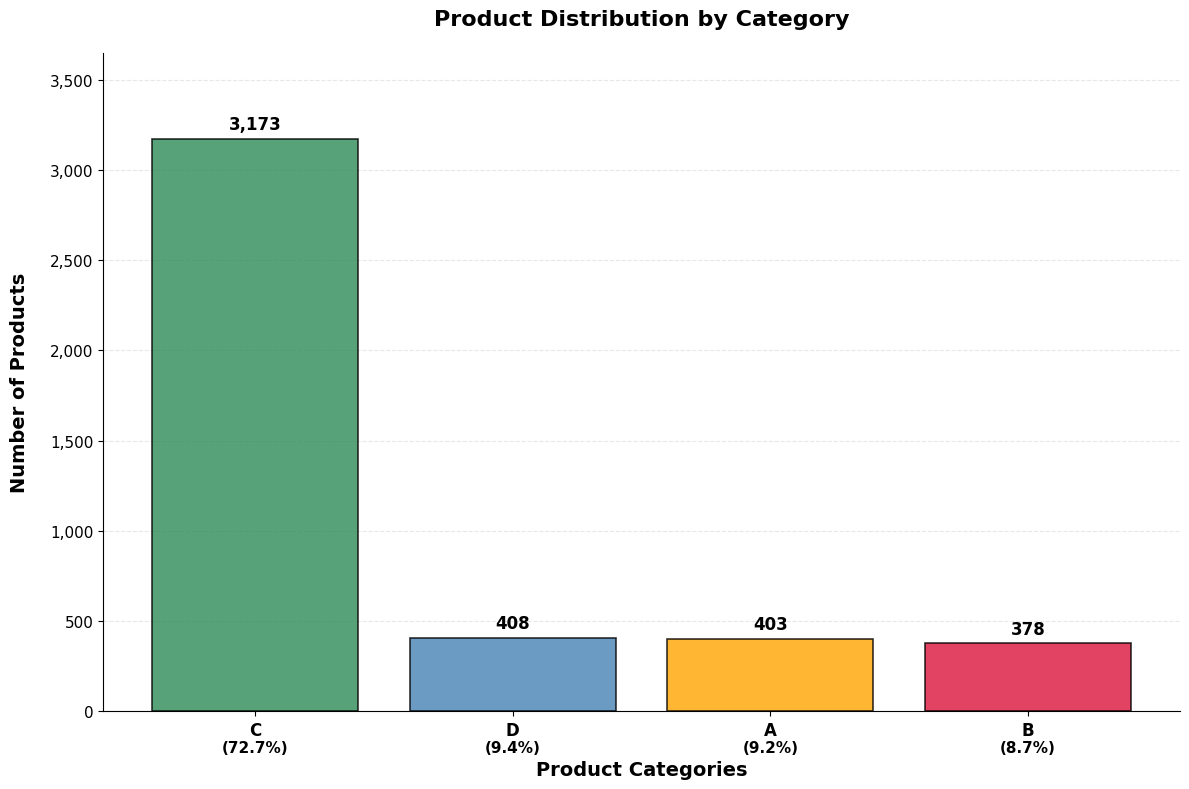

In [32]:

# Data
categories = ['C', 'D', 'A', 'B']
values = [3173, 408, 403, 378]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each category
colors = ['#2E8B57', '#4682B4', '#FFA500', '#DC143C']

# Create bar chart
bars = ax.bar(categories, values, color=colors, edgecolor='black', linewidth=1.2, alpha=0.8)

# Add values on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 30,
            f'{values[i]:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the chart
ax.set_xlabel('Product Categories', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel('Number of Products', fontsize=14, fontweight='bold', labelpad=15)
ax.set_title('Product Distribution by Category', fontsize=16, fontweight='bold', pad=20)

# Customize y-axis to show thousands with comma separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add some padding to y-axis limit
ax.set_ylim(0, max(values) * 1.15)

# Rotate x-axis labels if needed
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=11)

# Add data labels for percentages
total = sum(values)
for i, bar in enumerate(bars):
    percentage = (values[i] / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2., -max(values)*0.05,
            f'({percentage:.1f}%)', ha='center', va='top', fontsize=11,
            fontweight='bold', color='black')

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()

In [33]:
new_data['Stock'].value_counts()

,count
Stock,
In Stock,2865
Out of Stock,1497


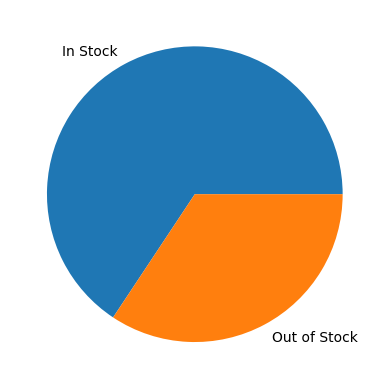

In [34]:
y = np.array([2865,1497])
mylabels = ["In Stock", "Out of Stock"]

plt.pie(y, labels = mylabels)
plt.show()

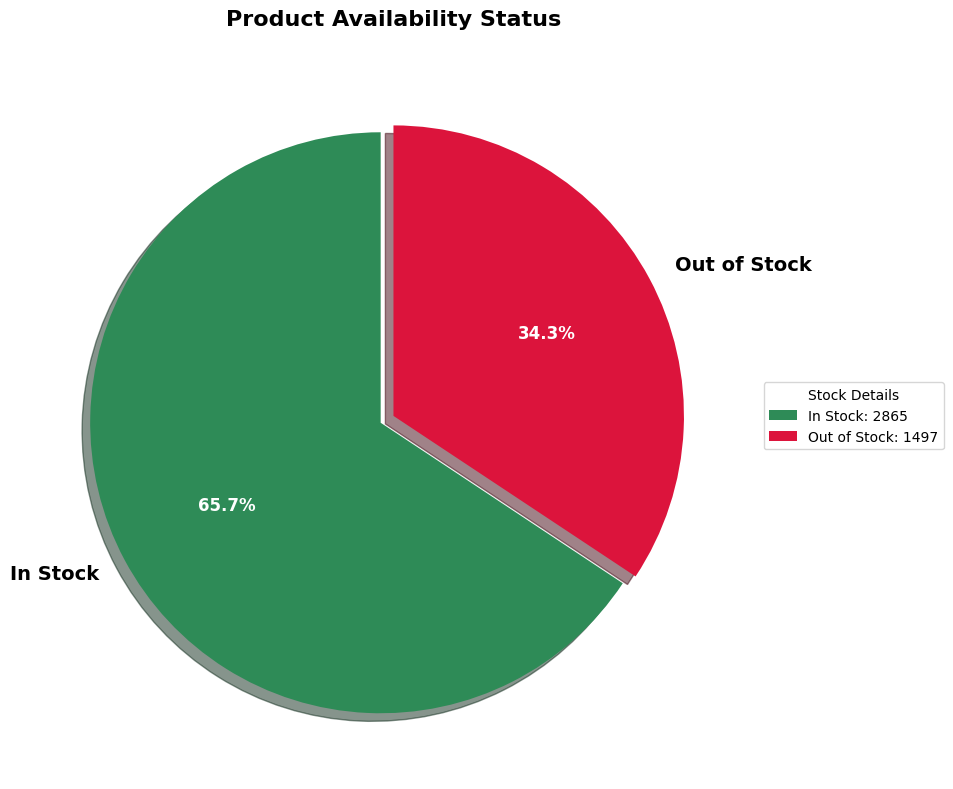

In [35]:

# Data
y = np.array([2865, 1497])
mylabels = ["In Stock", "Out of Stock"]
colors = ['#2E8B57', '#DC143C']  # More professional colors

# Create figure and chart
fig, ax = plt.subplots(figsize=(10, 8))

# Draw pie chart with enhancements
wedges, texts, autotexts = ax.pie(y,
                                  labels=mylabels,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  explode=(0.05, 0),  # Highlight "In Stock" slice
                                  shadow=True,  # Add shadow
                                  textprops={'fontsize': 14})

# Improve percentage appearance
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Improve label appearance
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

# Add title
plt.title('Product Availability Status', fontsize=16, fontweight='bold', pad=20)

# Add legend
ax.legend(wedges, [f'{label}: {value}' for label, value in zip(mylabels, y)],
          title="Stock Details",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Set equal aspect ratio
ax.set_aspect('equal')

# Display chart
plt.tight_layout()
plt.show()